# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Also Note
* I built in a 60-second wait (in variable "sleeptime") after every 50 records to keep from getting blocked by the endpoint.

In [1]:
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import time

# Amount of time to sleep between API calls
sleeptime = 60

# Import API key
from env.api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info

found_cities = []
clouds = []
country = []
dt = []
humidity = []
temp_max = []
wind = []
lat = []
lon = []

# Set the date of data collection for later use.
date = pd.to_datetime('today').strftime('%m/%d/%y')

# Set up record and set counters
record = 0
set = 1
setsize = 50

# Loop through the list of cities and perform a request for data on each
for city in cities:
    if record > setsize:
        set +=1
        record = 0
        # Sleep for a minute since we're only allowed 60 requests per minute
        print(f"Sleeping for {sleeptime} seconds...")
        time.sleep(sleeptime)
    else:
        print(f"Processing Record {record} of Set {set} | {city}")
        response = requests.get(query_url + city).json()
        try:
            clouds.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            dt.append(response['dt'])
            humidity.append(response['main']['humidity'])
            lat.append(response['coord']['lat'])
            lon.append(response['coord']['lon'])
            temp_max.append(response['main']['temp_max'])
            wind.append(response['wind']['speed'])
            found_cities.append(city)
            record += 1
 
        except:
            print(f"City \033[1m{city}\033[0m not found. Skipping...")
        
           
print ("""-----------------------------
Data Retrieval Complete      
-----------------------------""")


Processing Record 0 of Set 1 | haines junction
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | constitucion
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | sidi ali
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | koslan
Processing Record 9 of Set 1 | la grande
Processing Record 10 of Set 1 | illoqqortoormiut
City illoqqortoormiut not found. Skipping...
Processing Record 10 of Set 1 | touros
Processing Record 11 of Set 1 | airai
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | usinsk
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | kloulklubed
Processing Record 19 of Set 1 | iquitos
Processing Record 20 of Set 1 | huarmey
Processing Record 21 of Set 1 | herman

Processing Record 12 of Set 4 | port-gentil
Processing Record 13 of Set 4 | espera feliz
Processing Record 14 of Set 4 | vaitupu
City vaitupu not found. Skipping...
Processing Record 14 of Set 4 | los llanos de aridane
Processing Record 15 of Set 4 | lermontovka
Processing Record 16 of Set 4 | ilulissat
Processing Record 17 of Set 4 | chabahar
Processing Record 18 of Set 4 | envira
Processing Record 19 of Set 4 | puerto escondido
Processing Record 20 of Set 4 | pecos
Processing Record 21 of Set 4 | buchanan
Processing Record 22 of Set 4 | rapid valley
Processing Record 23 of Set 4 | nemuro
Processing Record 24 of Set 4 | mbini
Processing Record 25 of Set 4 | huilong
Processing Record 26 of Set 4 | rantepao
Processing Record 27 of Set 4 | toftir
City toftir not found. Skipping...
Processing Record 27 of Set 4 | polson
Processing Record 28 of Set 4 | mayor pablo lagerenza
Processing Record 29 of Set 4 | weinan
Processing Record 30 of Set 4 | la gomera
Processing Record 31 of Set 4 | mata

Processing Record 28 of Set 7 | arlit
Processing Record 29 of Set 7 | arona
Processing Record 30 of Set 7 | haapiti
Processing Record 31 of Set 7 | lagoa vermelha
Processing Record 32 of Set 7 | alice town
Processing Record 33 of Set 7 | vestmannaeyjar
Processing Record 34 of Set 7 | samalaeulu
City samalaeulu not found. Skipping...
Processing Record 34 of Set 7 | esil
Processing Record 35 of Set 7 | ardakan
Processing Record 36 of Set 7 | biloela
Processing Record 37 of Set 7 | hegang
Processing Record 38 of Set 7 | road town
Processing Record 39 of Set 7 | baykit
Processing Record 40 of Set 7 | cayenne
Processing Record 41 of Set 7 | nome
Processing Record 42 of Set 7 | yarkovo
Processing Record 43 of Set 7 | galgani
City galgani not found. Skipping...
Processing Record 43 of Set 7 | tiksi
Processing Record 44 of Set 7 | banff
Processing Record 45 of Set 7 | attawapiskat
City attawapiskat not found. Skipping...
Processing Record 45 of Set 7 | ayase
Processing Record 46 of Set 7 | kam

Processing Record 33 of Set 10 | warqla
City warqla not found. Skipping...
Processing Record 33 of Set 10 | pathein
Processing Record 34 of Set 10 | bongandanga
Processing Record 35 of Set 10 | saint-georges
Processing Record 36 of Set 10 | mana
Processing Record 37 of Set 10 | kazalinsk
City kazalinsk not found. Skipping...
Processing Record 37 of Set 10 | maceio
Processing Record 38 of Set 10 | nurpur
Processing Record 39 of Set 10 | alice springs
Processing Record 40 of Set 10 | bytow
Processing Record 41 of Set 10 | boddam
Processing Record 42 of Set 10 | el campo
Processing Record 43 of Set 10 | moron
Processing Record 44 of Set 10 | norman wells
Processing Record 45 of Set 10 | lages
Processing Record 46 of Set 10 | lolua
City lolua not found. Skipping...
Processing Record 46 of Set 10 | durusu
Processing Record 47 of Set 10 | tatarsk
Processing Record 48 of Set 10 | chokwe
Processing Record 49 of Set 10 | mackay
Processing Record 50 of Set 10 | ojinaga
Sleeping for 60 seconds...

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dataframe from the weather information lists.
cities_df = pd.DataFrame({
    'City':found_cities,
    'Cloudiness':clouds,
    'Country':country,
    'Date':dt,
    'Humidity':humidity,
    'Lat':lat,
    'Lng':lon,
    'Max Temp':temp_max,
    'Wind Speed':wind
})

In [5]:
# Export the city data to a .csv.
outfile = "output_data/cities.csv"
cities_df.to_csv(outfile, index=False, header=True)

In [6]:
# Display the dataframe value counts.
cities_df.count()

City          542
Cloudiness    542
Country       542
Date          542
Humidity      542
Lat           542
Lng           542
Max Temp      542
Wind Speed    542
dtype: int64

In [7]:
# Display the dataframe.
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,haines junction,99,CA,1579743204,97,60.75,-137.51,6.76,4.14
1,ushuaia,75,AR,1579743204,71,-54.80,-68.30,50.00,9.17
2,constitucion,59,CL,1579743164,94,-35.33,-72.42,56.61,5.23
3,vaini,40,TO,1579743101,79,-21.20,-175.20,84.20,13.87
4,sidi ali,0,DZ,1579743204,78,36.10,0.42,47.03,5.19
...,...,...,...,...,...,...,...,...,...
537,portland,90,US,1579743739,87,45.52,-122.68,54.00,12.75
538,inhambane,68,MZ,1579743799,65,-23.86,35.38,76.35,7.09
539,san carlos de bariloche,20,AR,1579743859,40,-41.15,-71.31,69.80,10.29
540,praia,95,CV,1579743595,83,14.92,-23.51,69.80,13.87


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


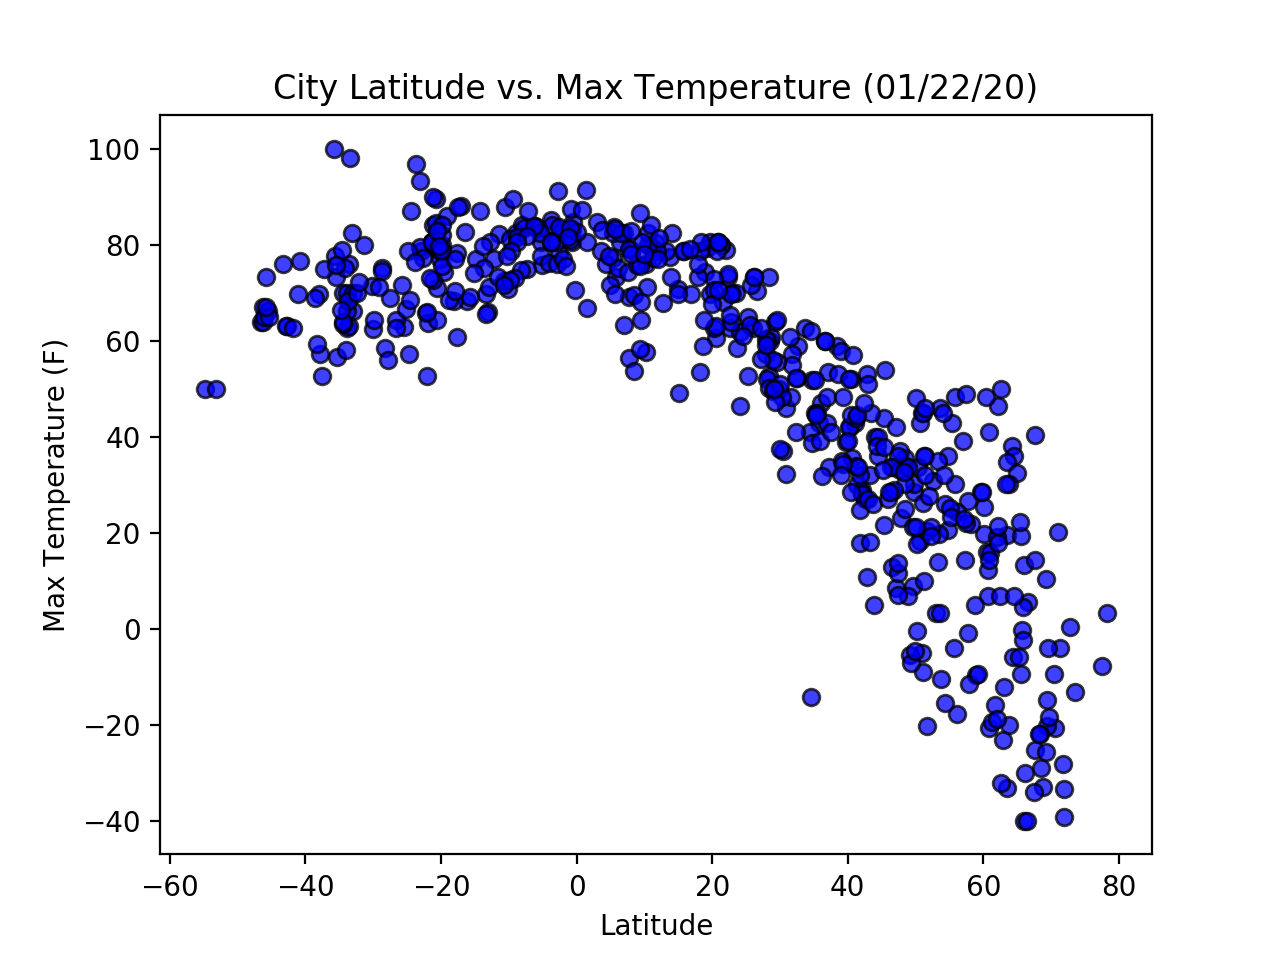

In [8]:
x_axis = cities_df['Lat']
data = cities_df['Max Temp']
plt.title("City Latitude vs. Max Temperature (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.savefig("output_data/all_max_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


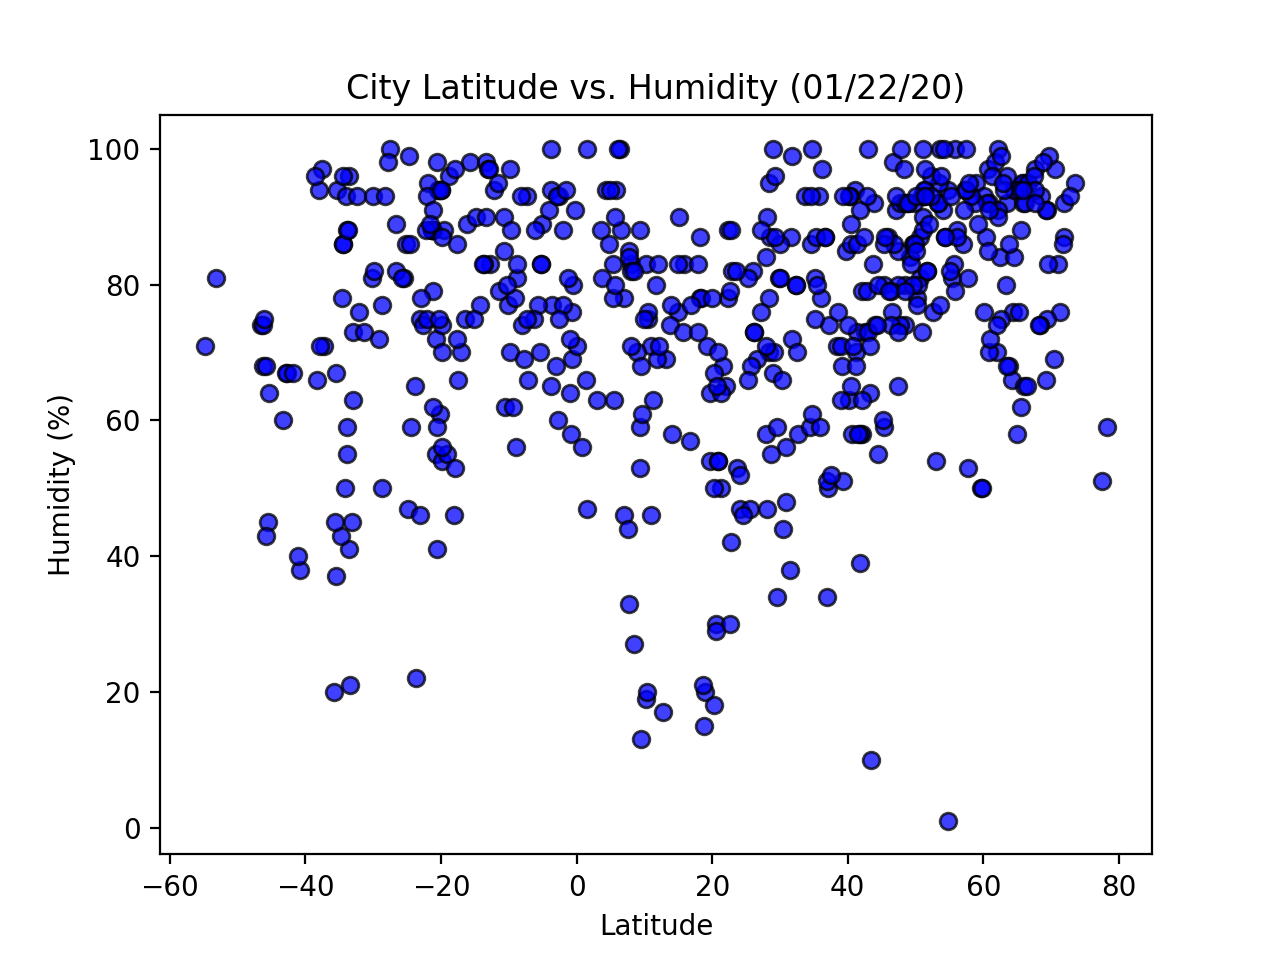

In [9]:
x_axis = cities_df['Lat']
data = cities_df['Humidity']
plt.title("City Latitude vs. Humidity (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.savefig("output_data/all_humidity.png")
plt.show()

#### Comments
* The Latitude vs. Humidity Plot shows the level of relative humidity based on latitude. 
* The majority of the cities have a level above 50%.

#### Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


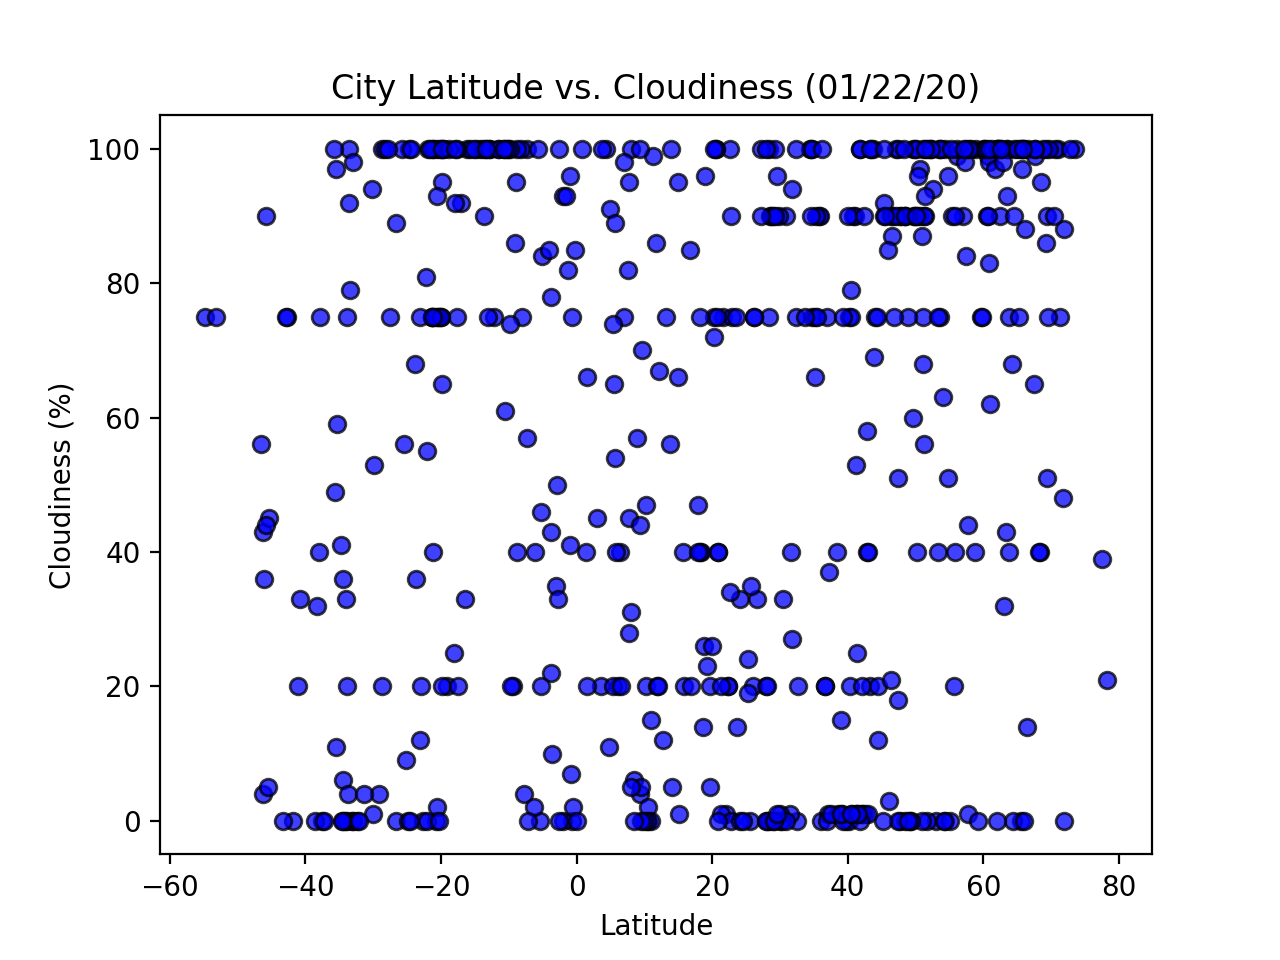

In [10]:
x_axis = cities_df['Lat']
data = cities_df['Cloudiness']
plt.title("City Latitude vs. Cloudiness (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.savefig("output_data/all_cloudiness.png")
plt.show()

#### Comments
* The Latitude vs. Cloudiness Plot shows the level of cloudiness based on latitude.
* Cloudiness generally decreases as the latitude increases.

#### Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


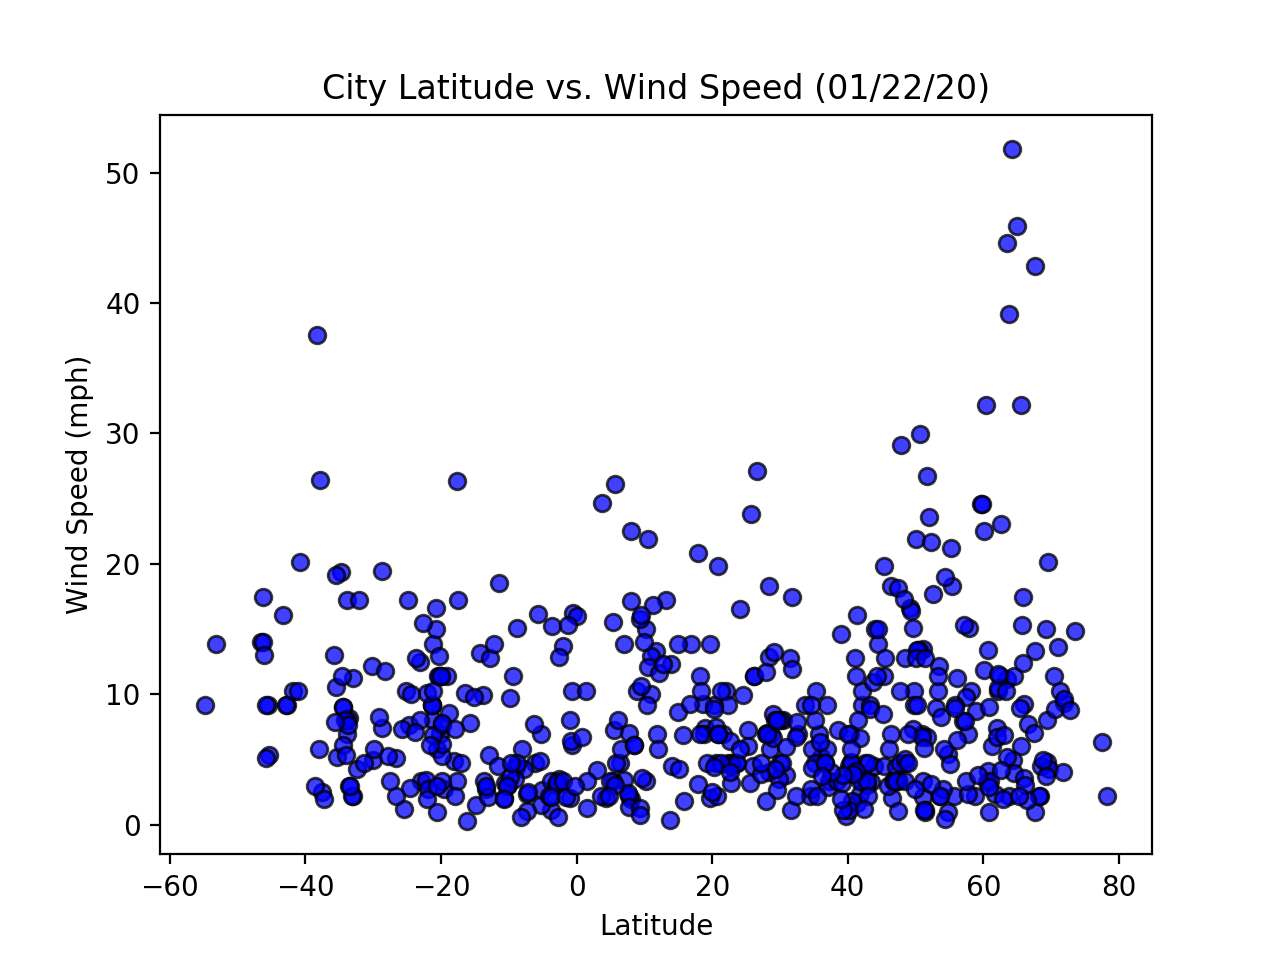

In [11]:
x_axis = cities_df['Lat']
data = cities_df['Wind Speed']
plt.title("City Latitude vs. Wind Speed (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.savefig("output_data/all_wind_speed.png")
plt.show()

#### Comments
* The Latitude vs. Wind Speed Plot shows the wind speed based on latitude. 
* Most cities have a wind speed below 20 mph.

## Linear Regression

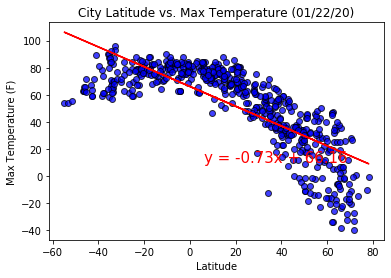

In [88]:
# OPTIONAL: Create a function to create Linear Regression plots
x_axis = cities_df['Lat']
data = cities_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("City Latitude vs. Max Temperature (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()


In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern_cities_df = cities_df.loc[cities_df['Lat'] > 0]
southern_cities_df = cities_df.loc[cities_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


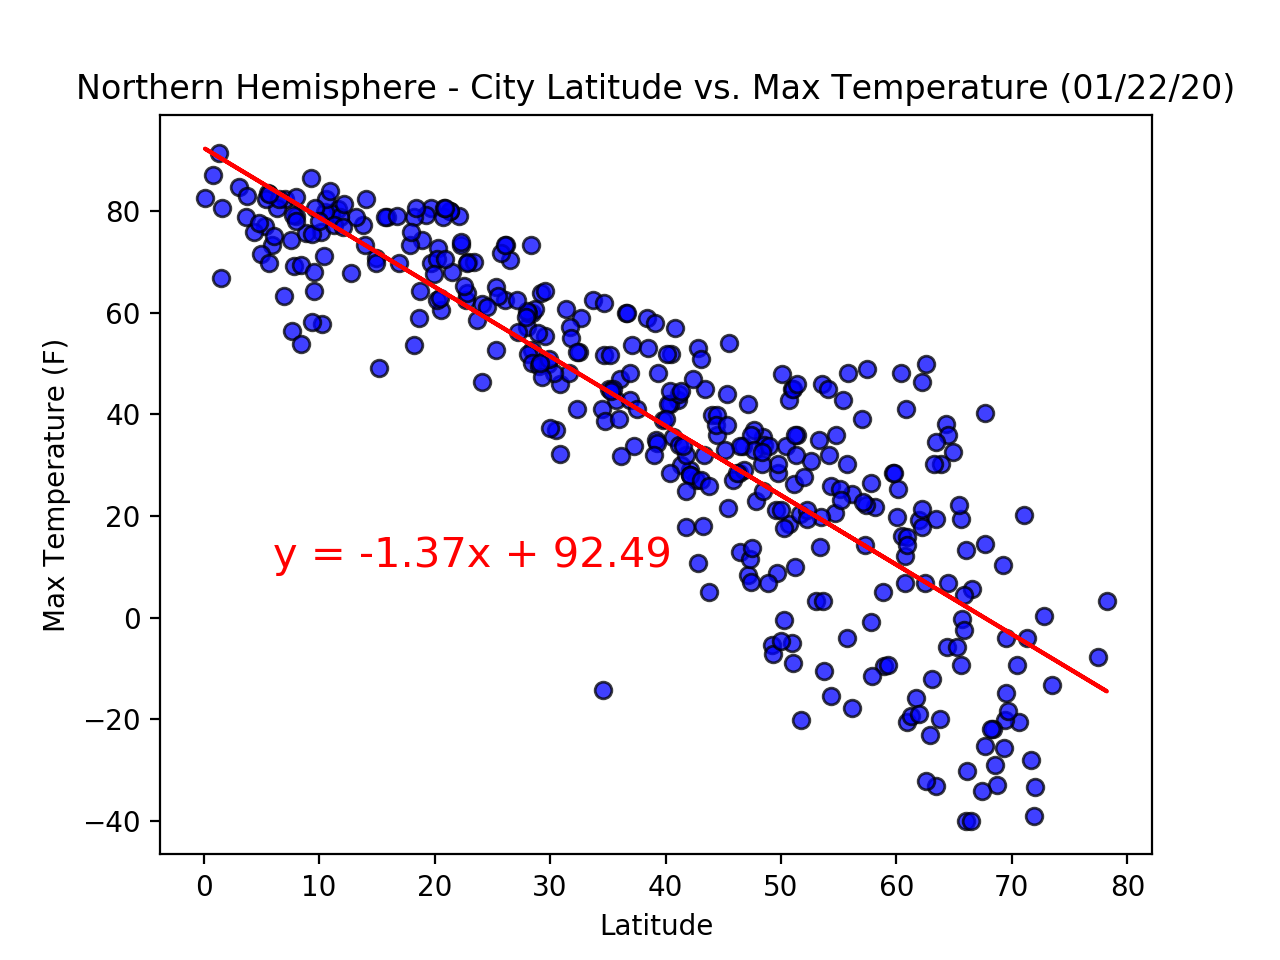

In [13]:
x_axis = northern_cities_df['Lat']
data = northern_cities_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - City Latitude vs. Max Temperature (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("output_data/north_regress_max_temp.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


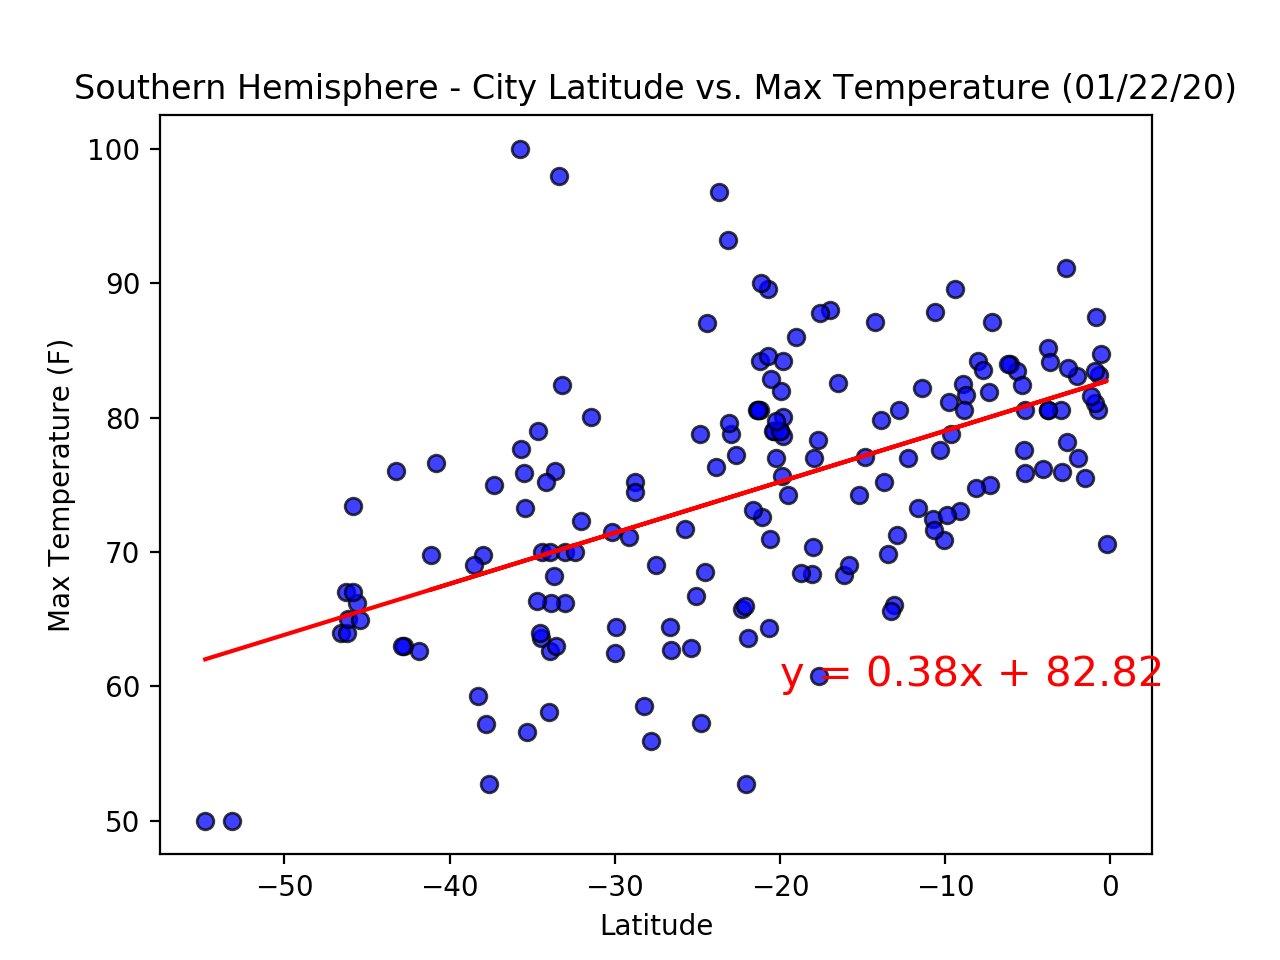

In [14]:
x_axis = southern_cities_df['Lat']
data = southern_cities_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-20,60),fontsize=15,color="red")
plt.title("Southern Hemisphere - City Latitude vs. Max Temperature (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("output_data/south_regress_max_temp.png")
plt.show()


#### Comments
* The "Northern Hemisphere - Max Temp vs. Latitude Linear Regression" plot and "Southern Hemisphere - Max Temp vs. Latitude Linear Regression" plot show maximum temperature by latitude.
* As latitude increases in the Northern Hemisphere, the maximum temperature decreases.
* As latitude increases in the Southern Hemisphere, the maximum temperature increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


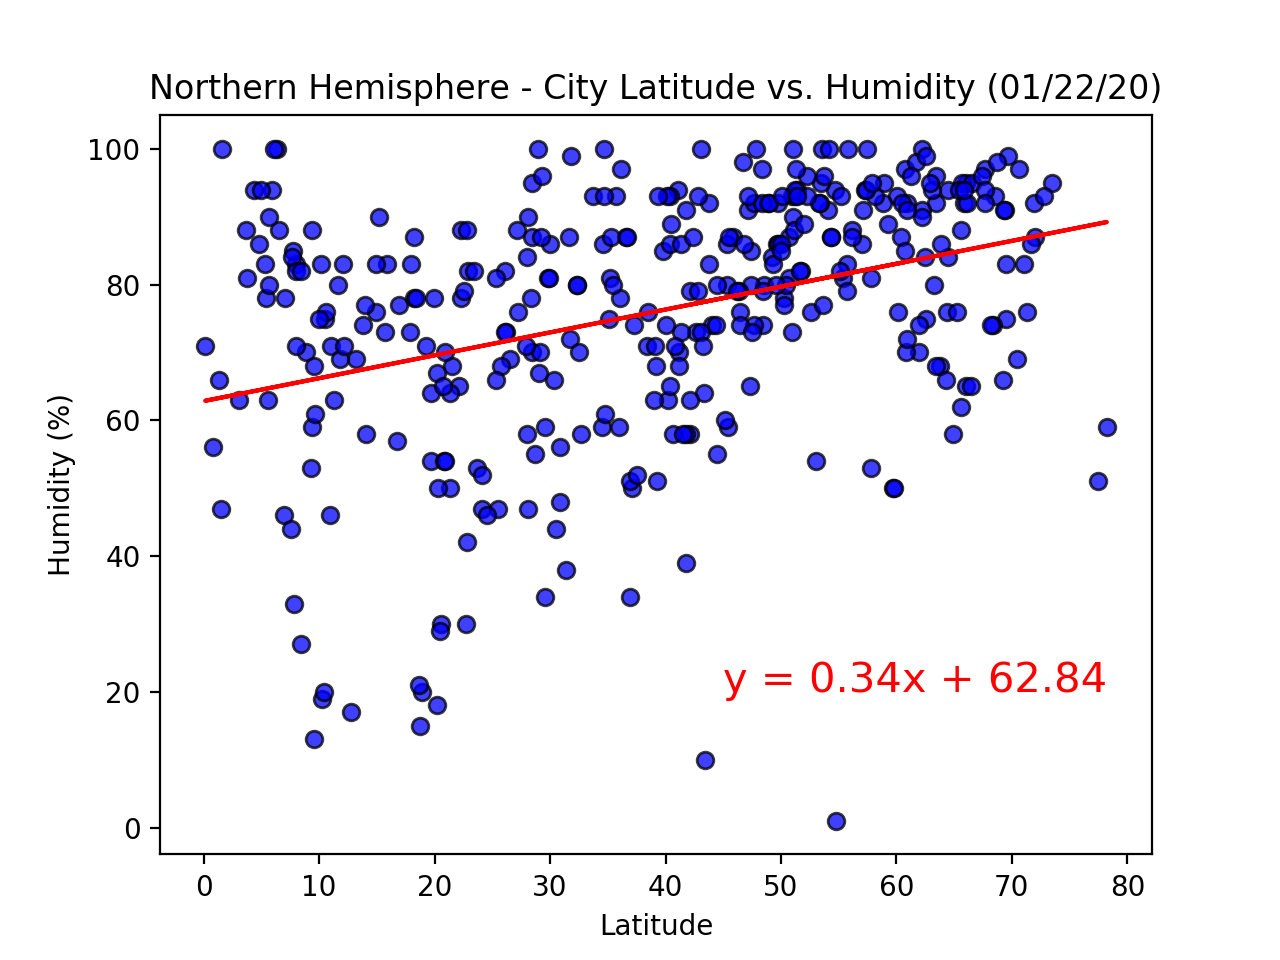

In [15]:
x_axis = northern_cities_df['Lat']
data = northern_cities_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,xy=(45,20),fontsize=15,color="red")
plt.title("Northern Hemisphere - City Latitude vs. Humidity (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/north_regress_humidity.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


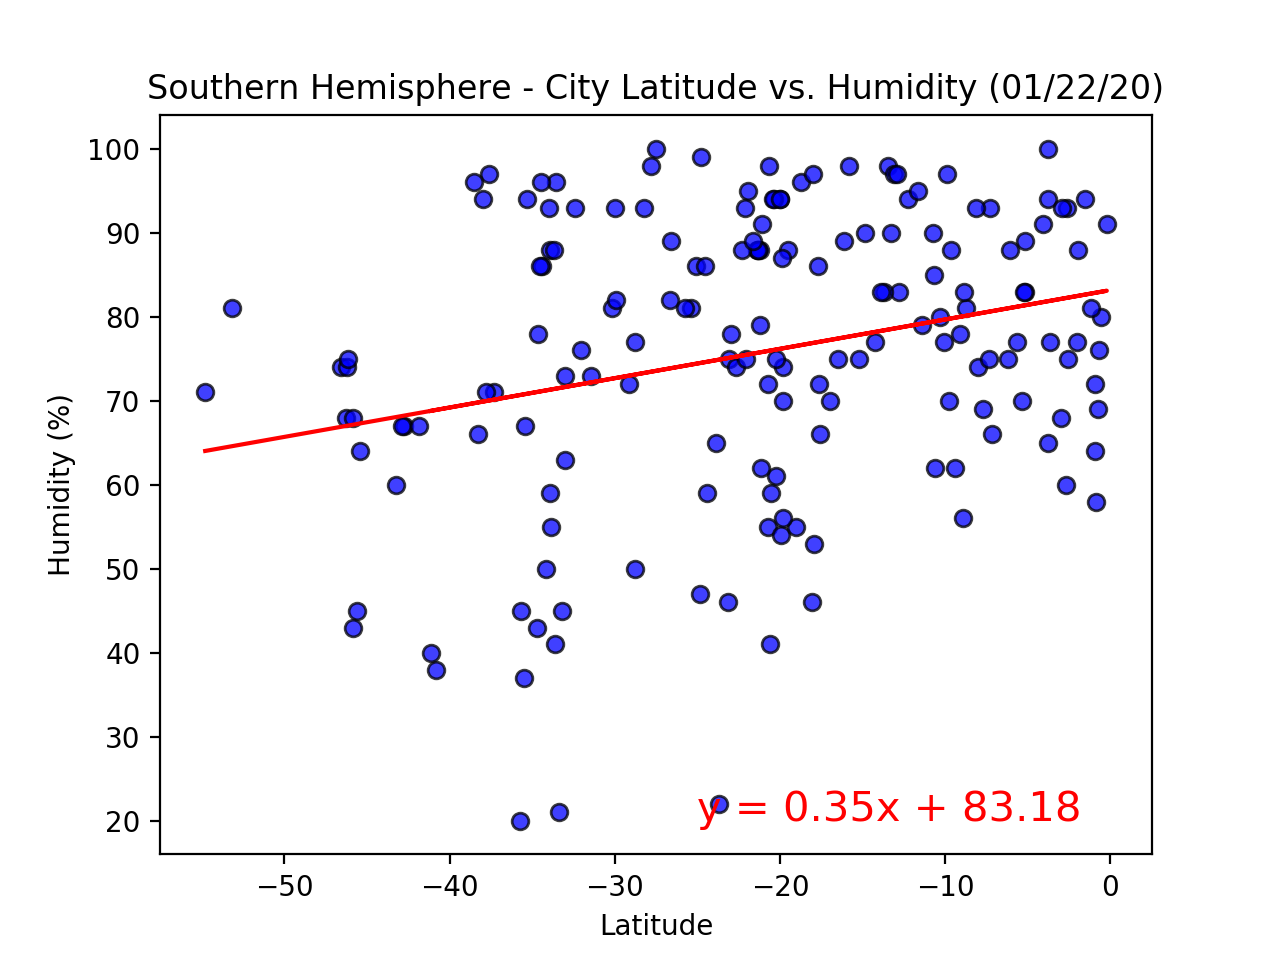

In [16]:
x_axis = southern_cities_df['Lat']
data = southern_cities_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,xy=(-25,20),fontsize=15,color="red")
plt.title("Southern Hemisphere - City Latitude vs. Humidity (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/south_regress_humidity.png")
plt.show()

#### Comments
* The "Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression" plot and "Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression" plot show maximum temperature by latitude.
* As latitude increases in the Northern Hemisphere, the humidity increases.
* As latitude increases in the Southern Hemisphere, the humidity increases.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


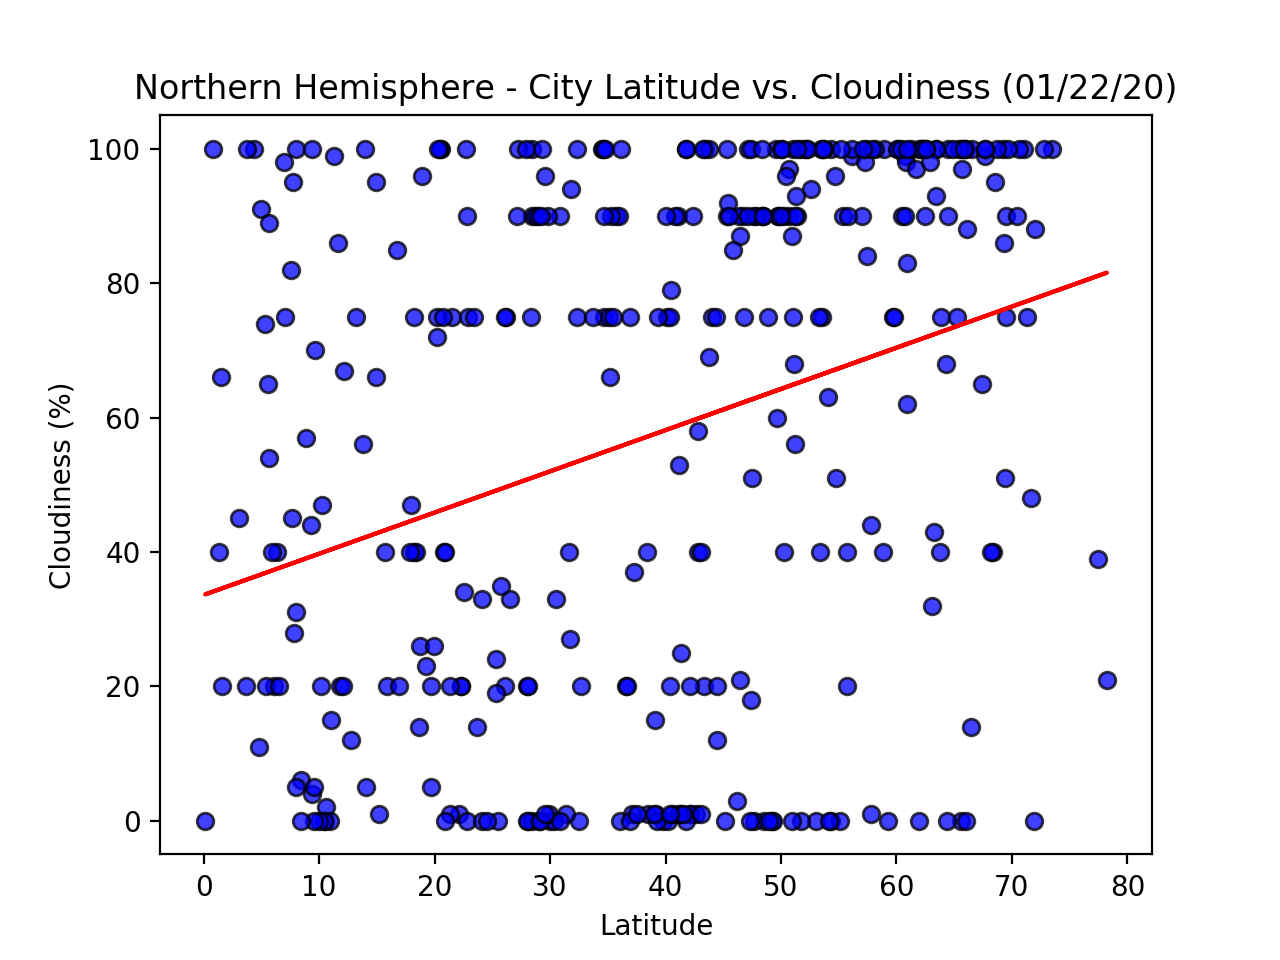

In [17]:
x_axis = northern_cities_df['Lat']
data = northern_cities_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,xy=(0,-30),fontsize=15,color="red")
plt.title("Northern Hemisphere - City Latitude vs. Cloudiness (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/north_regress_cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


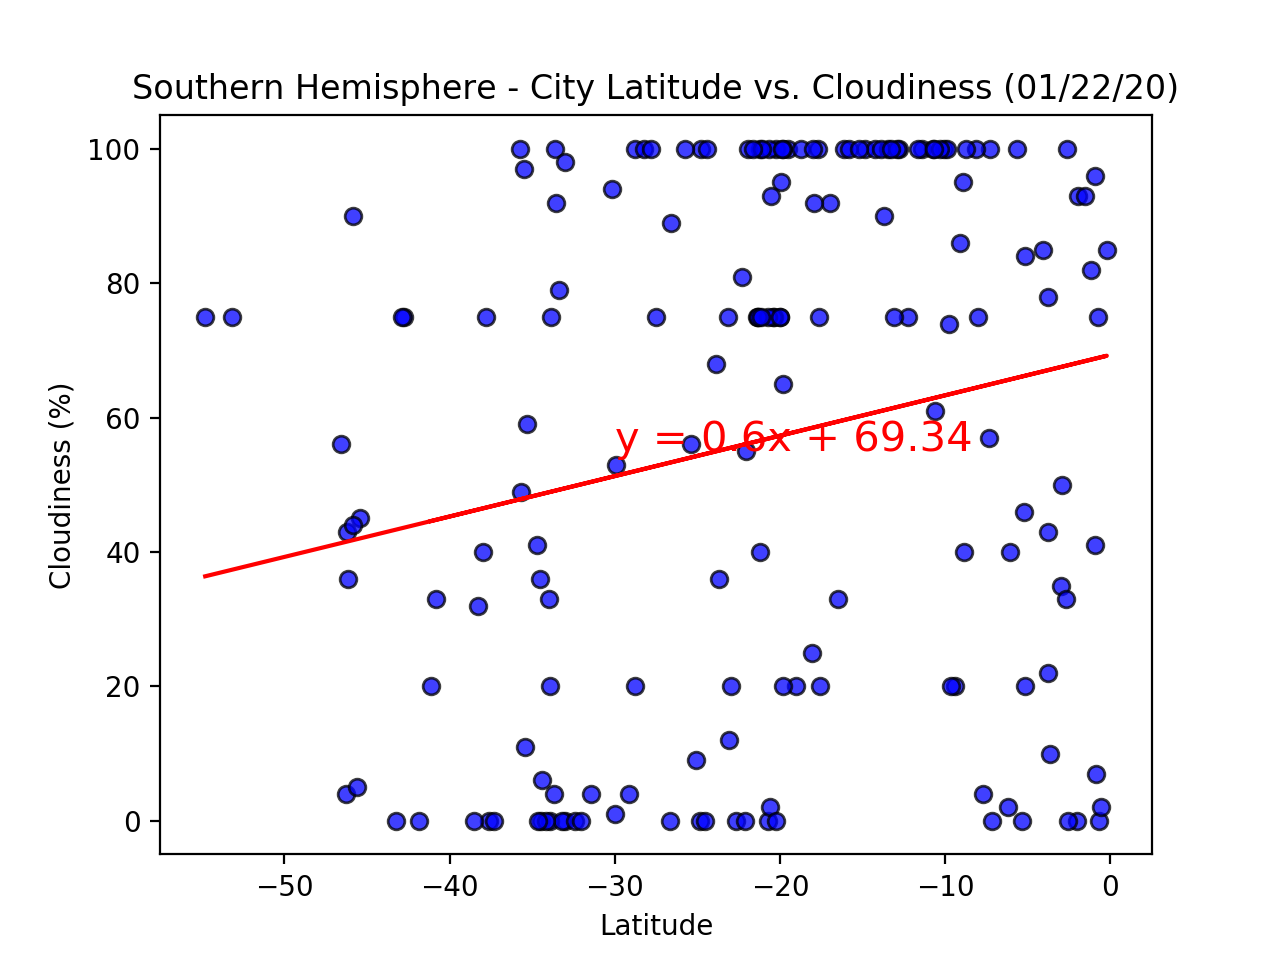

In [18]:
x_axis = southern_cities_df['Lat']
data = southern_cities_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,xy=(-30,55),fontsize=15,color="red")
plt.title("Southern Hemisphere - City Latitude vs. Cloudiness (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/south_regress_cloudiness.png")
plt.show()

#### Comments
* The "Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression" plot and "Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression" plot show cloudiness by latitude.
* As latitude increases in the Northern Hemisphere, the cloudiness decreases.
* As latitude increases in the Southern Hemisphere, the cloudiness increases.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


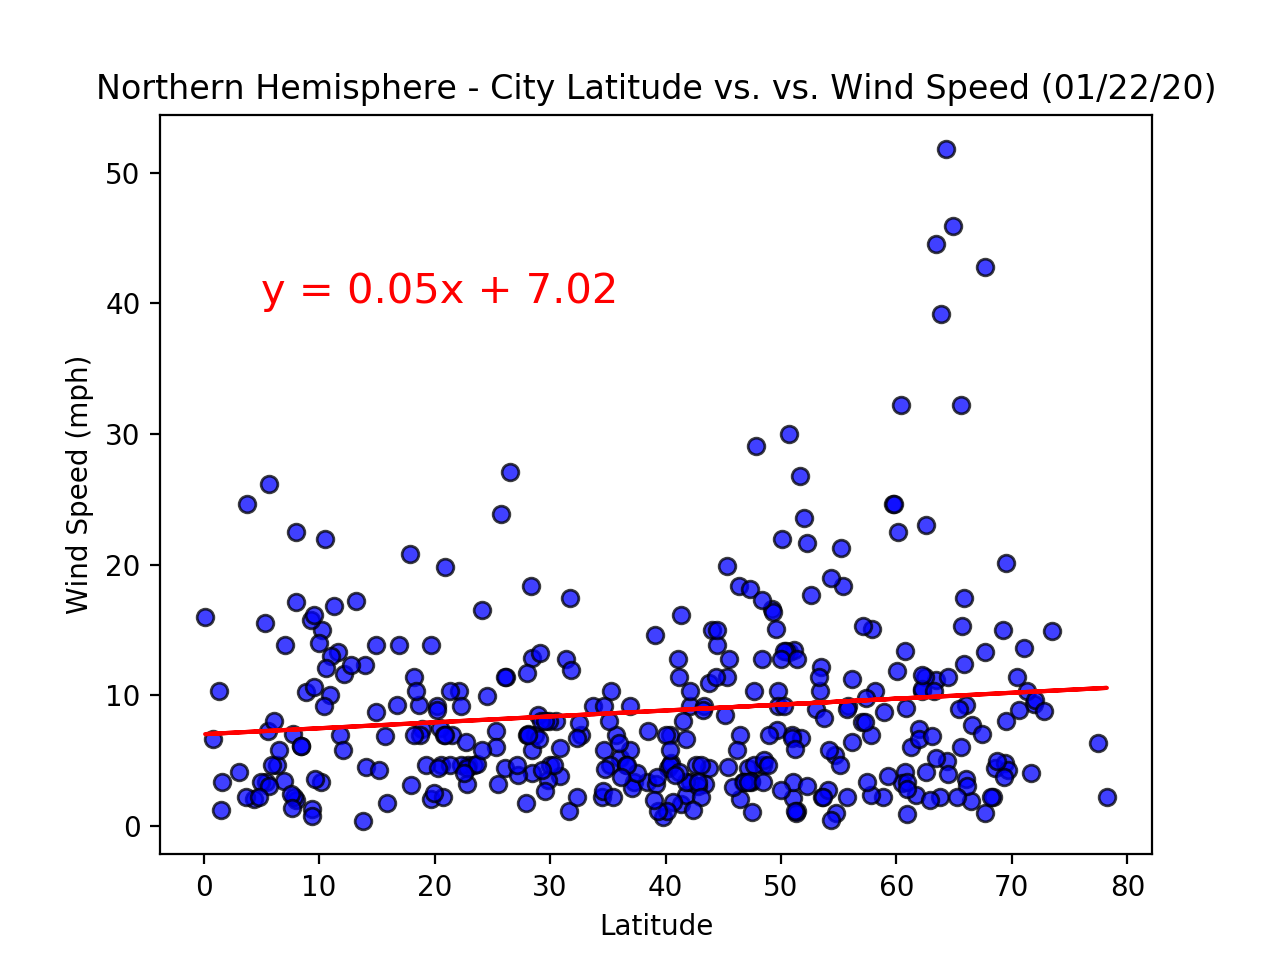

In [19]:
x_axis = northern_cities_df['Lat']
data = northern_cities_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,xy=(5,40),fontsize=15,color="red")
plt.title("Northern Hemisphere - City Latitude vs. vs. Wind Speed (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/north_regress_wind_speed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


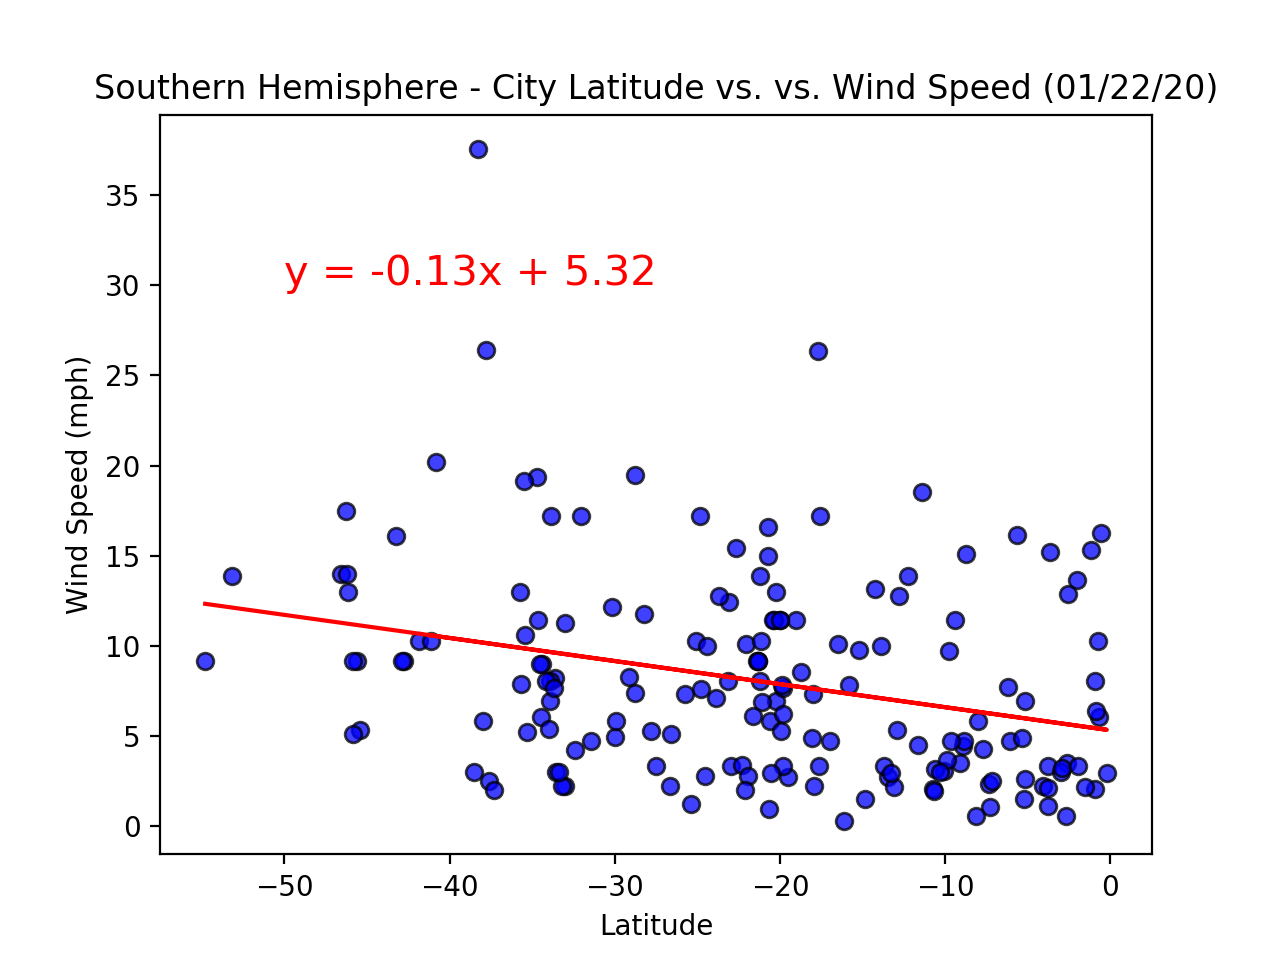

In [20]:
x_axis = southern_cities_df['Lat']
data = southern_cities_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,xy=(-50,30),fontsize=15,color="red")
plt.title("Southern Hemisphere - City Latitude vs. vs. Wind Speed (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/south_regress_wind_speed.png")
plt.show()

#### Comments
* The "Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression" plot and "Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression" plot show wind speed by latitude.
* As latitude increases in the Northern Hemisphere, the wind speed slightly increases.
* As latitude increases in the Southern Hemisphere, the wind speed slightly decreases.